In [4]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load dataset
df = pd.read_csv("/Users/esparancetuyishime/Desktop/finalmidterm/fake_job_postings.csv")
df = df.dropna(subset=['fraudulent'])
print(df.head())

   job_id                                      title            location  \
0       1                           Marketing Intern    US, NY, New York   
1       2  Customer Service - Cloud Video Production      NZ, , Auckland   
2       3    Commissioning Machinery Assistant (CMA)       US, IA, Wever   
3       4          Account Executive - Washington DC  US, DC, Washington   
4       5                        Bill Review Manager  US, FL, Fort Worth   

  department salary_range                                    company_profile  \
0  Marketing          NaN  We're Food52, and we've created a groundbreaki...   
1    Success          NaN  90 Seconds, the worlds Cloud Video Production ...   
2        NaN          NaN  Valor Services provides Workforce Solutions th...   
3      Sales          NaN  Our passion for improving quality of life thro...   
4        NaN          NaN  SpotSource Solutions LLC is a Global Human Cap...   

                                         description  \
0  Foo

Feature Engineering

In [ ]:


df['description_word_count'] = df['description'].fillna('').apply(lambda x: len(x.split()))
df['has_urgent'] = df['description'].str.contains('urgent', case=False, na=False).astype(int)
df['has_link'] = df['description'].str.contains('http|www', case=False, na=False).astype(int)
df['title_all_caps'] = df['title'].fillna('').apply(lambda x: int(x.isupper()))
df['description'] = df['description'].fillna('')


In [6]:

features = ['description', 'description_word_count', 'has_urgent', 'has_link', 'title_all_caps']
target = 'fraudulent'
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Preprocessing
text_transformer = Pipeline([('tfidf', TfidfVectorizer(stop_words='english', max_features=500))])
preprocessor = ColumnTransformer([
    ('text', text_transformer, 'description'),
    ('num', StandardScaler(), ['description_word_count', 'has_urgent', 'has_link', 'title_all_caps'])
])


Logistic Regression

In [7]:

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', LogisticRegression(solver='liblinear'))
])
logreg_params = {
    'clf__C': [0.01, 1, 10],
    'clf__penalty': ['l1', 'l2']
}
logreg_grid = GridSearchCV(logreg_pipeline, logreg_params, cv=5, scoring='precision')
logreg_grid.fit(X_train, y_train)
y_pred_logreg = logreg_grid.predict(X_test)
print("Logistic Regression Report")
print(classification_report(y_test, y_pred_logreg))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Logistic Regression Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       0.96      0.25      0.40       173

    accuracy                           0.96      3576
   macro avg       0.96      0.63      0.69      3576
weighted avg       0.96      0.96      0.95      3576



Random Forest classifier

In [8]:

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])
rf_params = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20],
    'clf__min_samples_split': [2, 5]
}
rf_grid = GridSearchCV(rf_pipeline, rf_params, cv=5, scoring='precision')
rf_grid.fit(X_train, y_train)
y_pred_rf = rf_grid.predict(X_test)
print("Random Forest Report")
print(classification_report(y_test, y_pred_rf))


Random Forest Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       1.00      0.20      0.33       173

    accuracy                           0.96      3576
   macro avg       0.98      0.60      0.65      3576
weighted avg       0.96      0.96      0.95      3576



Support Vector Machine

In [9]:

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('clf', SVC(probability=True))
])
svm_params = {
    'clf__C': [0.1, 1, 10],
    'clf__kernel': ['linear', 'rbf']
}
svm_grid = GridSearchCV(svm_pipeline, svm_params, cv=5, scoring='precision')
svm_grid.fit(X_train, y_train)
y_pred_svm = svm_grid.predict(X_test)
print("Support Vector Machine Report")
print(classification_report(y_test, y_pred_svm))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

Support Vector Machine Report
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3403
           1       1.00      0.24      0.38       173

    accuracy                           0.96      3576
   macro avg       0.98      0.62      0.68      3576
weighted avg       0.96      0.96      0.95      3576



visualizations

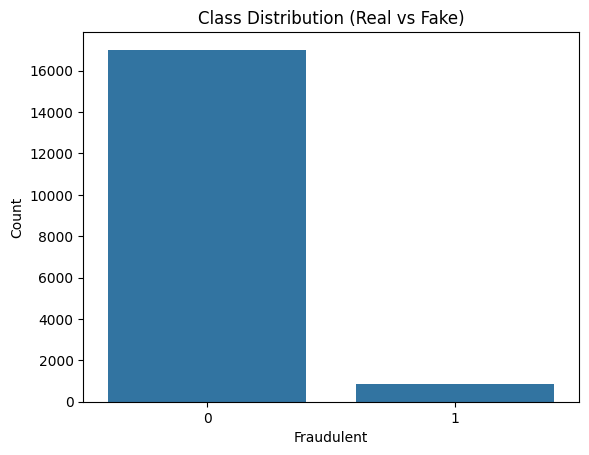

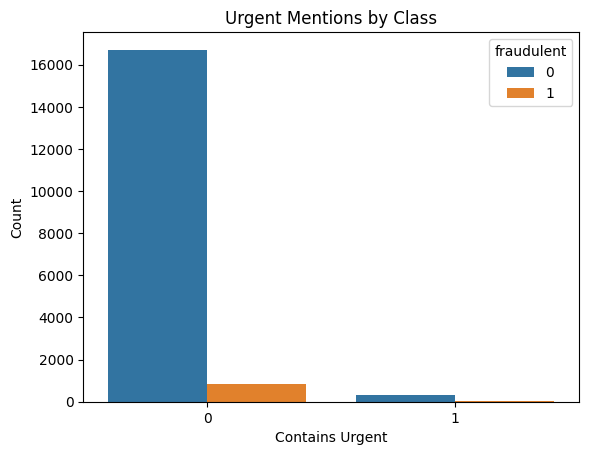

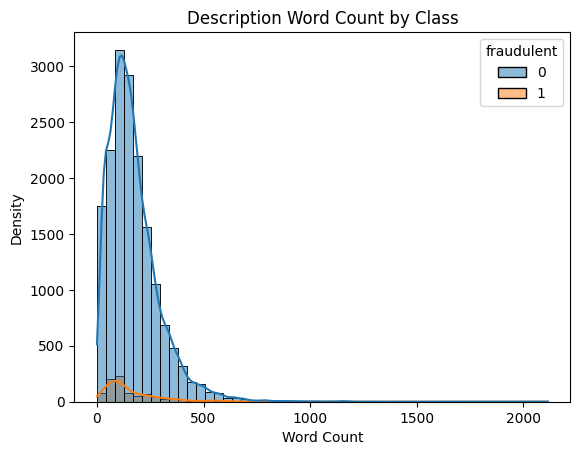

In [10]:

# Class Distribution
sns.countplot(x='fraudulent', data=df)
plt.title('Class Distribution (Real vs Fake)')
plt.xlabel('Fraudulent')
plt.ylabel('Count')
plt.show()

# Urgent Mentions
sns.countplot(x='has_urgent', hue='fraudulent', data=df)
plt.title('Urgent Mentions by Class')
plt.xlabel('Contains Urgent')
plt.ylabel('Count')
plt.show()

# Word Count Histogram
sns.histplot(data=df, x='description_word_count', hue='fraudulent', bins=50, kde=True)
plt.title('Description Word Count by Class')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.show()
